# The Plan

Even though I've finished my Twitter Project, I'm returning to the data to practice my Python skills. Everything I did used either Excel or SQL, but I know it's possible to redo everything using Python.

Honestly, I don't know how much of the project I'll recreate, but I'm going to do the following:

1. Clean the data (again)
2. Perform a statistical analysis on the data

Without furthe ado, let's begin...

# Step 1 - Data Cleaning

This ain't a picture-perfect Kaggle csv. It's raw and original. So I have a lot of cleaning to do so that it's formatted the way I want.

**Creating the Table**

First I'm importing the data from the CSV and adding column headers.

In [1]:
import pandas as pd

In [2]:
headers = ['Index','Tweet_Id','Tweet_Content','Tweet_Time','Impressions',
           'Engagements','Engagement_Rate','Rewteets','Replies','Likes',
           'Profile_Clicks','URL_Clicks','Detail_Expands','Follows','Media_Views','Media_Engagements']

#Since the CSV has no headers, I'm adding my own
twitter = pd.read_csv('../twitter_data.csv',header=None,names=headers)

In [3]:
twitter

,Index,Tweet_Id,Tweet_Content,Tweet_Time,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements
0,1,1625209878049394695,@MichaelComeau No one is ever dead now.,2023-02-13 19:06 +0000,94.0,2.0,0.021277,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0
1,2,1625209988003033088,"@excelumeohana Haha, legendary.",2023-02-13 19:07 +0000,16.0,1.0,0.062500,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2,3,1625210507073359872,"@Lu47Ki Alright, hit me with your best shot. I...",2023-02-13 19:09 +0000,30.0,8.0,0.266667,0.0,0.0,1.0,7.0,0.0,0.0,0,0,0
3,4,1625210730701066247,@worth_parker Combine this with a fun/memorabl...,2023-02-13 19:10 +0000,11.0,1.0,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
4,5,1625211168372432896,@lukasbenzlcom You wouldn't expect copywriting...,2023-02-13 19:11 +0000,20.0,2.0,0.100000,0.0,0.0,2.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2012,1635371692691451905,"@KitDore Haha, I didn’t want to pick ones that...",2023-03-13 20:06 +0000,12.0,1.0,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
2012,2013,1635372004919640065,@rubn_campelo Got it 🤝,2023-03-13 20:07 +0000,24.0,1.0,0.041667,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2013,2014,1635372698737197058,@KitDore 😂 fair enough,2023-03-13 20:10 +0000,4.0,1.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2014,2015,1635373320299483136,@iamfalsafi Got it Muzzammil!,2023-03-13 20:12 +0000,14.0,1.0,0.071429,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0


### Observation

Here are a few thing's I'm gonna have to do to make the data squeaky clean:

1. Drop the index column (since Pandas automatically does it for us)
2. Turn all floats into integers (except for engagement rate)
3. Separate tweets from comments by creating a column with binary values
4. Fix the Tweet_Time column to show dates separately
5. Round Engagement_Rate to 2 decimal places
6. Create Tweet Length Column
7. Reorder Columns To Make Table Easier To Read


**1. Dropping the index column**

In [4]:
#Dropping the index column

twitter = twitter.drop('Index',axis=1)

twitter

,Tweet_Id,Tweet_Content,Tweet_Time,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements
0,1625209878049394695,@MichaelComeau No one is ever dead now.,2023-02-13 19:06 +0000,94.0,2.0,0.021277,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0
1,1625209988003033088,"@excelumeohana Haha, legendary.",2023-02-13 19:07 +0000,16.0,1.0,0.062500,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2,1625210507073359872,"@Lu47Ki Alright, hit me with your best shot. I...",2023-02-13 19:09 +0000,30.0,8.0,0.266667,0.0,0.0,1.0,7.0,0.0,0.0,0,0,0
3,1625210730701066247,@worth_parker Combine this with a fun/memorabl...,2023-02-13 19:10 +0000,11.0,1.0,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
4,1625211168372432896,@lukasbenzlcom You wouldn't expect copywriting...,2023-02-13 19:11 +0000,20.0,2.0,0.100000,0.0,0.0,2.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1635371692691451905,"@KitDore Haha, I didn’t want to pick ones that...",2023-03-13 20:06 +0000,12.0,1.0,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
2012,1635372004919640065,@rubn_campelo Got it 🤝,2023-03-13 20:07 +0000,24.0,1.0,0.041667,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2013,1635372698737197058,@KitDore 😂 fair enough,2023-03-13 20:10 +0000,4.0,1.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2014,1635373320299483136,@iamfalsafi Got it Muzzammil!,2023-03-13 20:12 +0000,14.0,1.0,0.071429,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0



**2. Changing Data Types**

In [5]:
#Checking if the columns have the 
twitter.dtypes

Tweet_Id               int64
Tweet_Content         object
Tweet_Time            object
Impressions          float64
Engagements          float64
Engagement_Rate      float64
Rewteets             float64
Replies              float64
Likes                float64
Profile_Clicks       float64
URL_Clicks           float64
Detail_Expands       float64
Follows                int64
Media_Views            int64
Media_Engagements      int64
dtype: object

In [6]:
columns_to_change = ['Impressions', 'Engagements','Rewteets','Replies','Likes',
                     'Profile_Clicks','URL_Clicks','Detail_Expands']

twitter[columns_to_change] = twitter[columns_to_change].apply(lambda x: x.astype(int))

twitter['Tweet_Content'] = twitter['Tweet_Content'].astype(str)

twitter

,Tweet_Id,Tweet_Content,Tweet_Time,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements
0,1625209878049394695,@MichaelComeau No one is ever dead now.,2023-02-13 19:06 +0000,94,2,0.021277,0,1,1,0,0,0,0,0,0
1,1625209988003033088,"@excelumeohana Haha, legendary.",2023-02-13 19:07 +0000,16,1,0.062500,0,0,1,0,0,0,0,0,0
2,1625210507073359872,"@Lu47Ki Alright, hit me with your best shot. I...",2023-02-13 19:09 +0000,30,8,0.266667,0,0,1,7,0,0,0,0,0
3,1625210730701066247,@worth_parker Combine this with a fun/memorabl...,2023-02-13 19:10 +0000,11,1,0.090909,0,0,1,0,0,0,0,0,0
4,1625211168372432896,@lukasbenzlcom You wouldn't expect copywriting...,2023-02-13 19:11 +0000,20,2,0.100000,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1635371692691451905,"@KitDore Haha, I didn’t want to pick ones that...",2023-03-13 20:06 +0000,12,1,0.083333,0,1,0,0,0,0,0,0,0
2012,1635372004919640065,@rubn_campelo Got it 🤝,2023-03-13 20:07 +0000,24,1,0.041667,0,0,1,0,0,0,0,0,0
2013,1635372698737197058,@KitDore 😂 fair enough,2023-03-13 20:10 +0000,4,1,0.250000,0,0,1,0,0,0,0,0,0
2014,1635373320299483136,@iamfalsafi Got it Muzzammil!,2023-03-13 20:12 +0000,14,1,0.071429,0,0,1,0,0,0,0,0,0


In [7]:
twitter.dtypes

Tweet_Id               int64
Tweet_Content         object
Tweet_Time            object
Impressions            int64
Engagements            int64
Engagement_Rate      float64
Rewteets               int64
Replies                int64
Likes                  int64
Profile_Clicks         int64
URL_Clicks             int64
Detail_Expands         int64
Follows                int64
Media_Views            int64
Media_Engagements      int64
dtype: object

**3. Separate tweets from comments by creating a column with binary values**

In [8]:
#Creating new column assigning binary yes or no depending if tweet is comment or tweet
twitter['Tweet_Or_Comment'] = twitter['Tweet_Content'].apply(lambda x: 0 if x.startswith('@') else 1)

In [9]:
twitter.head(20)

,Tweet_Id,Tweet_Content,Tweet_Time,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements,Tweet_Or_Comment
0,1625209878049394695,@MichaelComeau No one is ever dead now.,2023-02-13 19:06 +0000,94,2,0.021277,0,1,1,0,0,0,0,0,0,0
1,1625209988003033088,"@excelumeohana Haha, legendary.",2023-02-13 19:07 +0000,16,1,0.062500,0,0,1,0,0,0,0,0,0,0
2,1625210507073359872,"@Lu47Ki Alright, hit me with your best shot. I...",2023-02-13 19:09 +0000,30,8,0.266667,0,0,1,7,0,0,0,0,0,0
3,1625210730701066247,@worth_parker Combine this with a fun/memorabl...,2023-02-13 19:10 +0000,11,1,0.090909,0,0,1,0,0,0,0,0,0,0
4,1625211168372432896,@lukasbenzlcom You wouldn't expect copywriting...,2023-02-13 19:11 +0000,20,2,0.100000,0,0,2,0,0,0,0,0,0,0
5,1625211448191291405,@lukasbenzlcom It's scary how some people have...,2023-02-13 19:12 +0000,18,2,0.111111,0,1,0,0,0,1,0,0,0,0
6,1625212385781751825,@MichaelComeau That would be epic.,2023-02-13 19:16 +0000,86,1,0.011628,0,0,0,0,0,1,0,0,0,0
7,1625212612265779221,@MollyLye1 But you have to be careful!\n\nBeca...,2023-02-13 19:17 +0000,13,2,0.153846,0,1,1,0,0,0,0,0,0,0
8,1625213521276313618,"@Java_writes Haha, I'm glad the coffee didn't ...",2023-02-13 19:21 +0000,7,3,0.428571,0,1,1,0,0,1,0,0,0,0
9,1625213777133072385,@luckyrollmau It's painful. I got drunk on Fri...,2023-02-13 19:22 +0000,27,1,0.037037,0,1,0,0,0,0,0,0,0,0


In [10]:
twitter.describe()

,Tweet_Id,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements,Tweet_Or_Comment
count,2.016000e+03,2016.000000,2016.000000,2015.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.00000
mean,1.629551e+18,72.343750,6.371032,0.115918,0.042163,0.939980,2.173115,0.915675,0.011905,2.196429,0.013889,0.143353,0.077877,0.09623
std,2.589772e+15,282.405218,22.876109,0.113147,0.291668,2.549533,5.394813,6.684290,0.153882,9.972275,0.150452,1.354630,1.182329,0.29498
min,1.625210e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.627381e+18,11.000000,1.000000,0.047619,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.629184e+18,21.000000,2.000000,0.090909,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.631321e+18,39.000000,3.000000,0.150000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.635373e+18,6063.000000,364.000000,1.000000,5.000000,35.000000,76.000000,178.000000,4.000000,133.000000,4.000000,37.000000,36.000000,1.00000


**4. Fix the Tweet_Time column to show dates separately**

In [11]:
#Creating a new date column based on the first 10 characters in Tweet_Time
def new_date(date):
    return date[:10]

twitter['Tweet_Date'] = twitter['Tweet_Time'].apply(new_date)

In [12]:
twitter

,Tweet_Id,Tweet_Content,Tweet_Time,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements,Tweet_Or_Comment,Tweet_Date
0,1625209878049394695,@MichaelComeau No one is ever dead now.,2023-02-13 19:06 +0000,94,2,0.021277,0,1,1,0,0,0,0,0,0,0,2023-02-13
1,1625209988003033088,"@excelumeohana Haha, legendary.",2023-02-13 19:07 +0000,16,1,0.062500,0,0,1,0,0,0,0,0,0,0,2023-02-13
2,1625210507073359872,"@Lu47Ki Alright, hit me with your best shot. I...",2023-02-13 19:09 +0000,30,8,0.266667,0,0,1,7,0,0,0,0,0,0,2023-02-13
3,1625210730701066247,@worth_parker Combine this with a fun/memorabl...,2023-02-13 19:10 +0000,11,1,0.090909,0,0,1,0,0,0,0,0,0,0,2023-02-13
4,1625211168372432896,@lukasbenzlcom You wouldn't expect copywriting...,2023-02-13 19:11 +0000,20,2,0.100000,0,0,2,0,0,0,0,0,0,0,2023-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1635371692691451905,"@KitDore Haha, I didn’t want to pick ones that...",2023-03-13 20:06 +0000,12,1,0.083333,0,1,0,0,0,0,0,0,0,0,2023-03-13
2012,1635372004919640065,@rubn_campelo Got it 🤝,2023-03-13 20:07 +0000,24,1,0.041667,0,0,1,0,0,0,0,0,0,0,2023-03-13
2013,1635372698737197058,@KitDore 😂 fair enough,2023-03-13 20:10 +0000,4,1,0.250000,0,0,1,0,0,0,0,0,0,0,2023-03-13
2014,1635373320299483136,@iamfalsafi Got it Muzzammil!,2023-03-13 20:12 +0000,14,1,0.071429,0,0,1,0,0,0,0,0,0,0,2023-03-13


In [13]:
def new_time(time):
    return time[11:16]

twitter['Tweet_Time'] = twitter['Tweet_Time'].apply(new_time)

twitter

,Tweet_Id,Tweet_Content,Tweet_Time,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements,Tweet_Or_Comment,Tweet_Date
0,1625209878049394695,@MichaelComeau No one is ever dead now.,19:06,94,2,0.021277,0,1,1,0,0,0,0,0,0,0,2023-02-13
1,1625209988003033088,"@excelumeohana Haha, legendary.",19:07,16,1,0.062500,0,0,1,0,0,0,0,0,0,0,2023-02-13
2,1625210507073359872,"@Lu47Ki Alright, hit me with your best shot. I...",19:09,30,8,0.266667,0,0,1,7,0,0,0,0,0,0,2023-02-13
3,1625210730701066247,@worth_parker Combine this with a fun/memorabl...,19:10,11,1,0.090909,0,0,1,0,0,0,0,0,0,0,2023-02-13
4,1625211168372432896,@lukasbenzlcom You wouldn't expect copywriting...,19:11,20,2,0.100000,0,0,2,0,0,0,0,0,0,0,2023-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1635371692691451905,"@KitDore Haha, I didn’t want to pick ones that...",20:06,12,1,0.083333,0,1,0,0,0,0,0,0,0,0,2023-03-13
2012,1635372004919640065,@rubn_campelo Got it 🤝,20:07,24,1,0.041667,0,0,1,0,0,0,0,0,0,0,2023-03-13
2013,1635372698737197058,@KitDore 😂 fair enough,20:10,4,1,0.250000,0,0,1,0,0,0,0,0,0,0,2023-03-13
2014,1635373320299483136,@iamfalsafi Got it Muzzammil!,20:12,14,1,0.071429,0,0,1,0,0,0,0,0,0,0,2023-03-13


**5. Round Engagement_Rate to 2 decimal places**

In [14]:
#Rounding the values in the Engagement_Rate column
twitter['Engagement_Rate'] = twitter['Engagement_Rate'].apply(lambda x: round(x,2))

twitter

,Tweet_Id,Tweet_Content,Tweet_Time,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements,Tweet_Or_Comment,Tweet_Date
0,1625209878049394695,@MichaelComeau No one is ever dead now.,19:06,94,2,0.02,0,1,1,0,0,0,0,0,0,0,2023-02-13
1,1625209988003033088,"@excelumeohana Haha, legendary.",19:07,16,1,0.06,0,0,1,0,0,0,0,0,0,0,2023-02-13
2,1625210507073359872,"@Lu47Ki Alright, hit me with your best shot. I...",19:09,30,8,0.27,0,0,1,7,0,0,0,0,0,0,2023-02-13
3,1625210730701066247,@worth_parker Combine this with a fun/memorabl...,19:10,11,1,0.09,0,0,1,0,0,0,0,0,0,0,2023-02-13
4,1625211168372432896,@lukasbenzlcom You wouldn't expect copywriting...,19:11,20,2,0.10,0,0,2,0,0,0,0,0,0,0,2023-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1635371692691451905,"@KitDore Haha, I didn’t want to pick ones that...",20:06,12,1,0.08,0,1,0,0,0,0,0,0,0,0,2023-03-13
2012,1635372004919640065,@rubn_campelo Got it 🤝,20:07,24,1,0.04,0,0,1,0,0,0,0,0,0,0,2023-03-13
2013,1635372698737197058,@KitDore 😂 fair enough,20:10,4,1,0.25,0,0,1,0,0,0,0,0,0,0,2023-03-13
2014,1635373320299483136,@iamfalsafi Got it Muzzammil!,20:12,14,1,0.07,0,0,1,0,0,0,0,0,0,0,2023-03-13


**6. Create Tweet Length Column**

In [15]:
#Figures out how many characters long a tweet is
def tweet_length_range(tweet):
    length = len(tweet)
    if 0 < length <= 56:
        return "0-56"
    elif 56 < length <= 112:
        return "57-112"
    elif 112 < length <= 168:
        return "113-168"
    elif 168 < length <= 224:
        return "169-224"
    else:
        return "225-280"

twitter['Tweet_Length_Range'] = twitter['Tweet_Content'].apply(tweet_length_range)

twitter

,Tweet_Id,Tweet_Content,Tweet_Time,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements,Tweet_Or_Comment,Tweet_Date,Tweet_Length_Range
0,1625209878049394695,@MichaelComeau No one is ever dead now.,19:06,94,2,0.02,0,1,1,0,0,0,0,0,0,0,2023-02-13,0-56
1,1625209988003033088,"@excelumeohana Haha, legendary.",19:07,16,1,0.06,0,0,1,0,0,0,0,0,0,0,2023-02-13,0-56
2,1625210507073359872,"@Lu47Ki Alright, hit me with your best shot. I...",19:09,30,8,0.27,0,0,1,7,0,0,0,0,0,0,2023-02-13,57-112
3,1625210730701066247,@worth_parker Combine this with a fun/memorabl...,19:10,11,1,0.09,0,0,1,0,0,0,0,0,0,0,2023-02-13,57-112
4,1625211168372432896,@lukasbenzlcom You wouldn't expect copywriting...,19:11,20,2,0.10,0,0,2,0,0,0,0,0,0,0,2023-02-13,113-168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1635371692691451905,"@KitDore Haha, I didn’t want to pick ones that...",20:06,12,1,0.08,0,1,0,0,0,0,0,0,0,0,2023-03-13,57-112
2012,1635372004919640065,@rubn_campelo Got it 🤝,20:07,24,1,0.04,0,0,1,0,0,0,0,0,0,0,2023-03-13,0-56
2013,1635372698737197058,@KitDore 😂 fair enough,20:10,4,1,0.25,0,0,1,0,0,0,0,0,0,0,2023-03-13,0-56
2014,1635373320299483136,@iamfalsafi Got it Muzzammil!,20:12,14,1,0.07,0,0,1,0,0,0,0,0,0,0,2023-03-13,0-56


**7. Reorder Columns To Make Table Easier To Read**

In [16]:
#Find all column names
twitter.columns

Index(['Tweet_Id', 'Tweet_Content', 'Tweet_Time', 'Impressions', 'Engagements',
       'Engagement_Rate', 'Rewteets', 'Replies', 'Likes', 'Profile_Clicks',
       'URL_Clicks', 'Detail_Expands', 'Follows', 'Media_Views',
       'Media_Engagements', 'Tweet_Or_Comment', 'Tweet_Date',
       'Tweet_Length_Range'],
      dtype='object')

In [17]:
twitter = twitter[['Tweet_Id','Tweet_Date','Tweet_Time','Tweet_Content','Tweet_Or_Comment','Tweet_Length_Range','Impressions',
                  'Engagements','Engagement_Rate','Rewteets', 'Replies','Likes','Profile_Clicks','URL_Clicks','Detail_Expands',
                  'Follows','Media_Views','Media_Engagements']]

twitter

,Tweet_Id,Tweet_Date,Tweet_Time,Tweet_Content,Tweet_Or_Comment,Tweet_Length_Range,Impressions,Engagements,Engagement_Rate,Rewteets,Replies,Likes,Profile_Clicks,URL_Clicks,Detail_Expands,Follows,Media_Views,Media_Engagements
0,1625209878049394695,2023-02-13,19:06,@MichaelComeau No one is ever dead now.,0,0-56,94,2,0.02,0,1,1,0,0,0,0,0,0
1,1625209988003033088,2023-02-13,19:07,"@excelumeohana Haha, legendary.",0,0-56,16,1,0.06,0,0,1,0,0,0,0,0,0
2,1625210507073359872,2023-02-13,19:09,"@Lu47Ki Alright, hit me with your best shot. I...",0,57-112,30,8,0.27,0,0,1,7,0,0,0,0,0
3,1625210730701066247,2023-02-13,19:10,@worth_parker Combine this with a fun/memorabl...,0,57-112,11,1,0.09,0,0,1,0,0,0,0,0,0
4,1625211168372432896,2023-02-13,19:11,@lukasbenzlcom You wouldn't expect copywriting...,0,113-168,20,2,0.10,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1635371692691451905,2023-03-13,20:06,"@KitDore Haha, I didn’t want to pick ones that...",0,57-112,12,1,0.08,0,1,0,0,0,0,0,0,0
2012,1635372004919640065,2023-03-13,20:07,@rubn_campelo Got it 🤝,0,0-56,24,1,0.04,0,0,1,0,0,0,0,0,0
2013,1635372698737197058,2023-03-13,20:10,@KitDore 😂 fair enough,0,0-56,4,1,0.25,0,0,1,0,0,0,0,0,0
2014,1635373320299483136,2023-03-13,20:12,@iamfalsafi Got it Muzzammil!,0,0-56,14,1,0.07,0,0,1,0,0,0,0,0,0


# Step 2 - Exploratory Data Analysis

Now I'm gonna run a lot of similar analysis as I did [with SQL](https://github.com/Mike-McKee/twitter_project/blob/master/Twitter_Queries.sql), and I'll do a few more intuitive ones that aren't easy *or not possible* to find using SQL.

# DELETE LATER

Here are some things to look at:

- Average metrics per stat and how it differs when you look at (1. all 2. tweets just 3. comments just)
- Correlation between tweet length and other metrics
- Relationship between impressions, engagement rates, likes, retweets, etc..

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

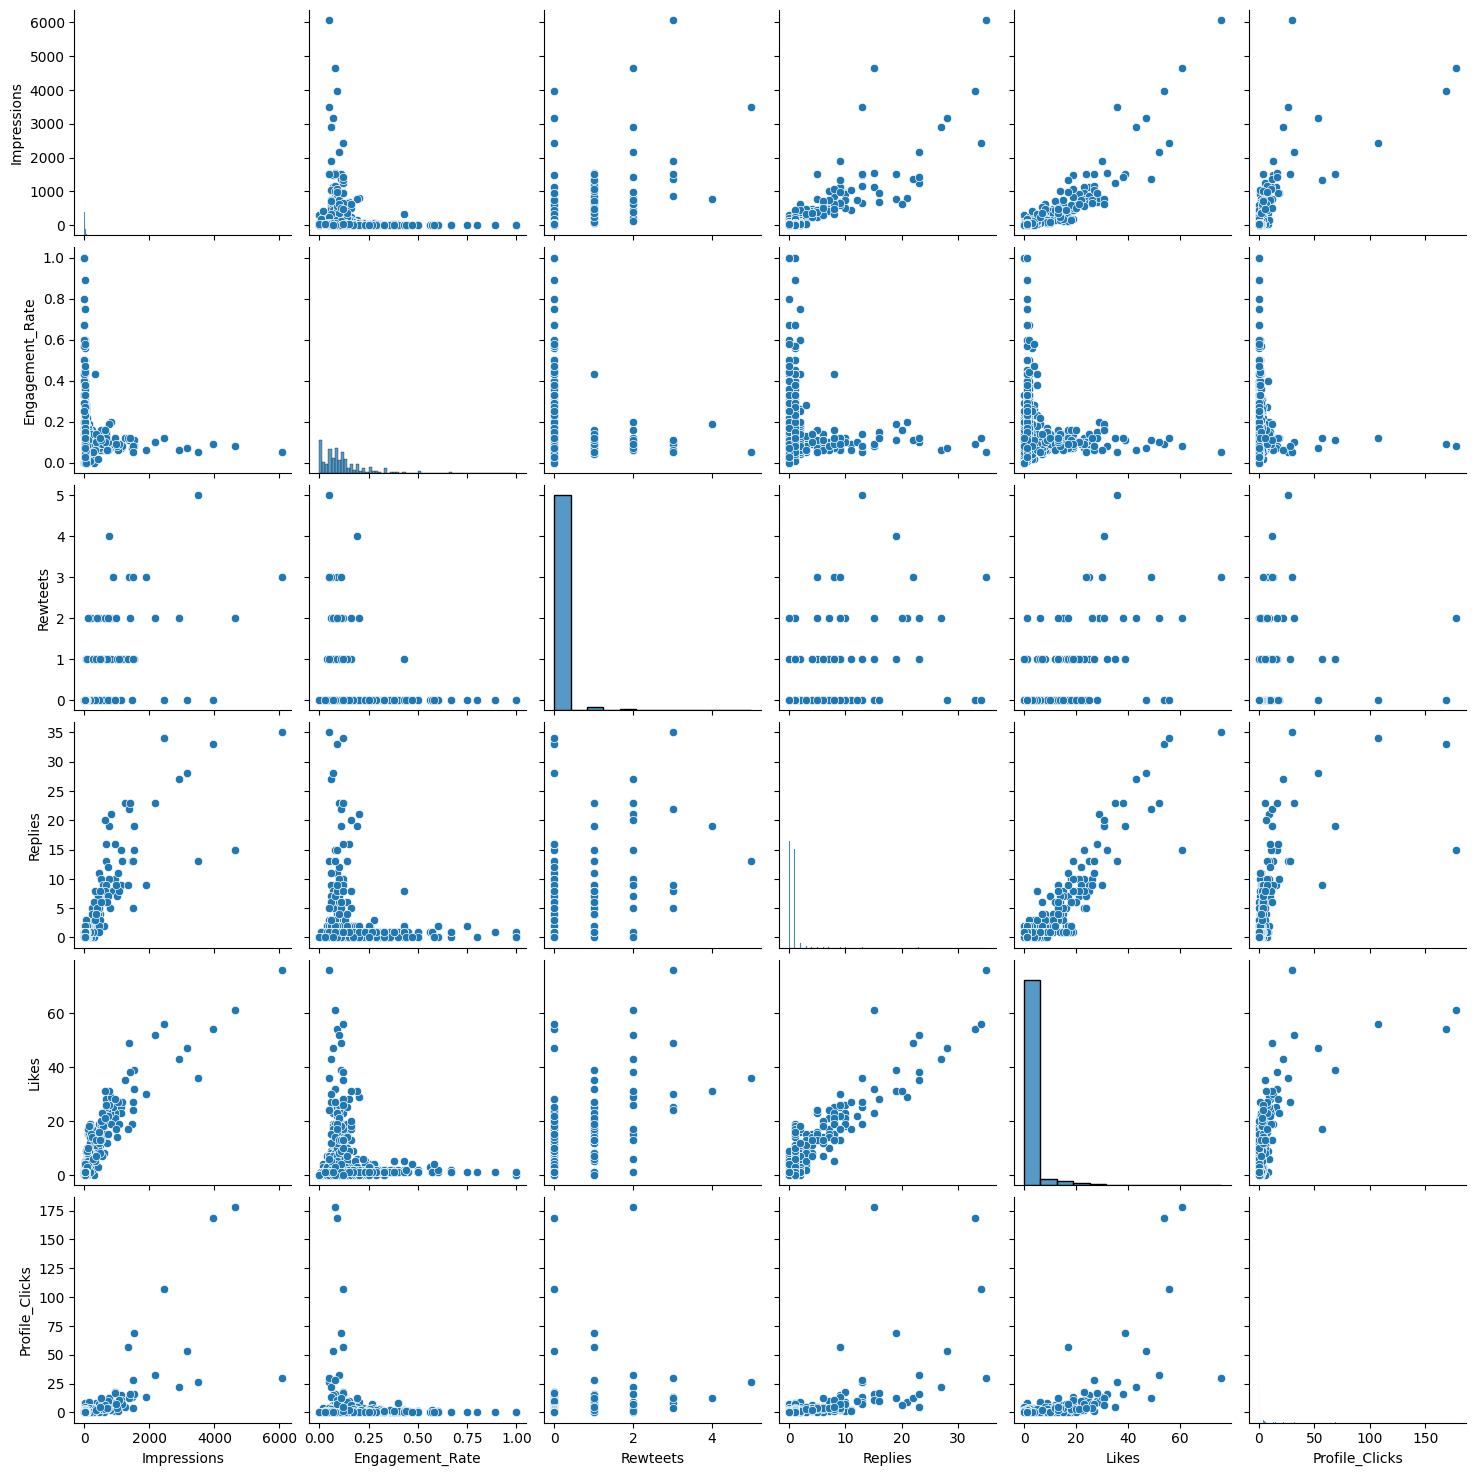

In [25]:
select_data = twitter[['Impressions','Engagement_Rate','Rewteets','Replies','Likes','Profile_Clicks']]

sns.pairplot(select_data)
plt.show()

In [30]:
tweets_only = twitter[twitter['Tweet_Or_Comment'] == 1]
comments_only = twitter[twitter['Tweet_Or_Comment'] == 0]

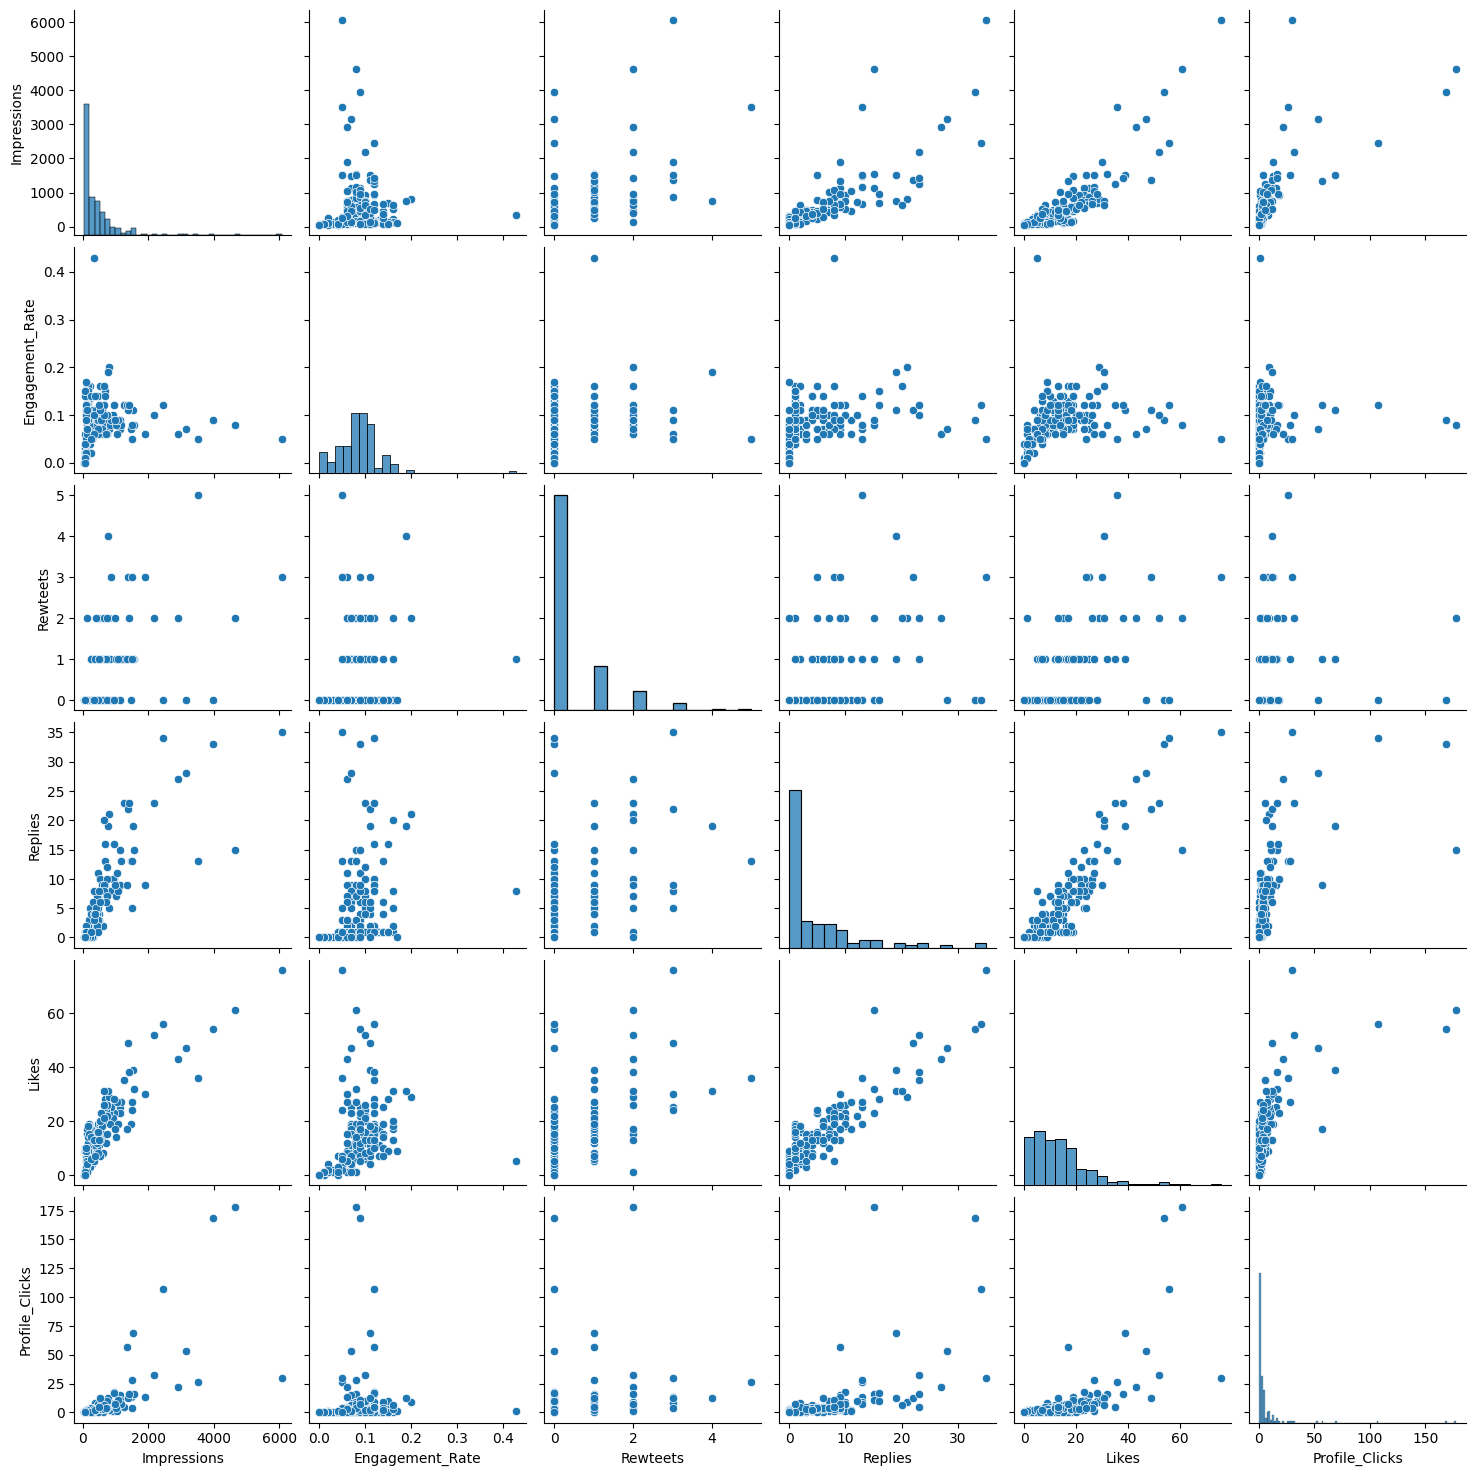

In [31]:
more_specific_data = tweets_only[['Impressions','Engagement_Rate','Rewteets','Replies','Likes','Profile_Clicks']]

sns.pairplot(more_specific_data)
plt.show()

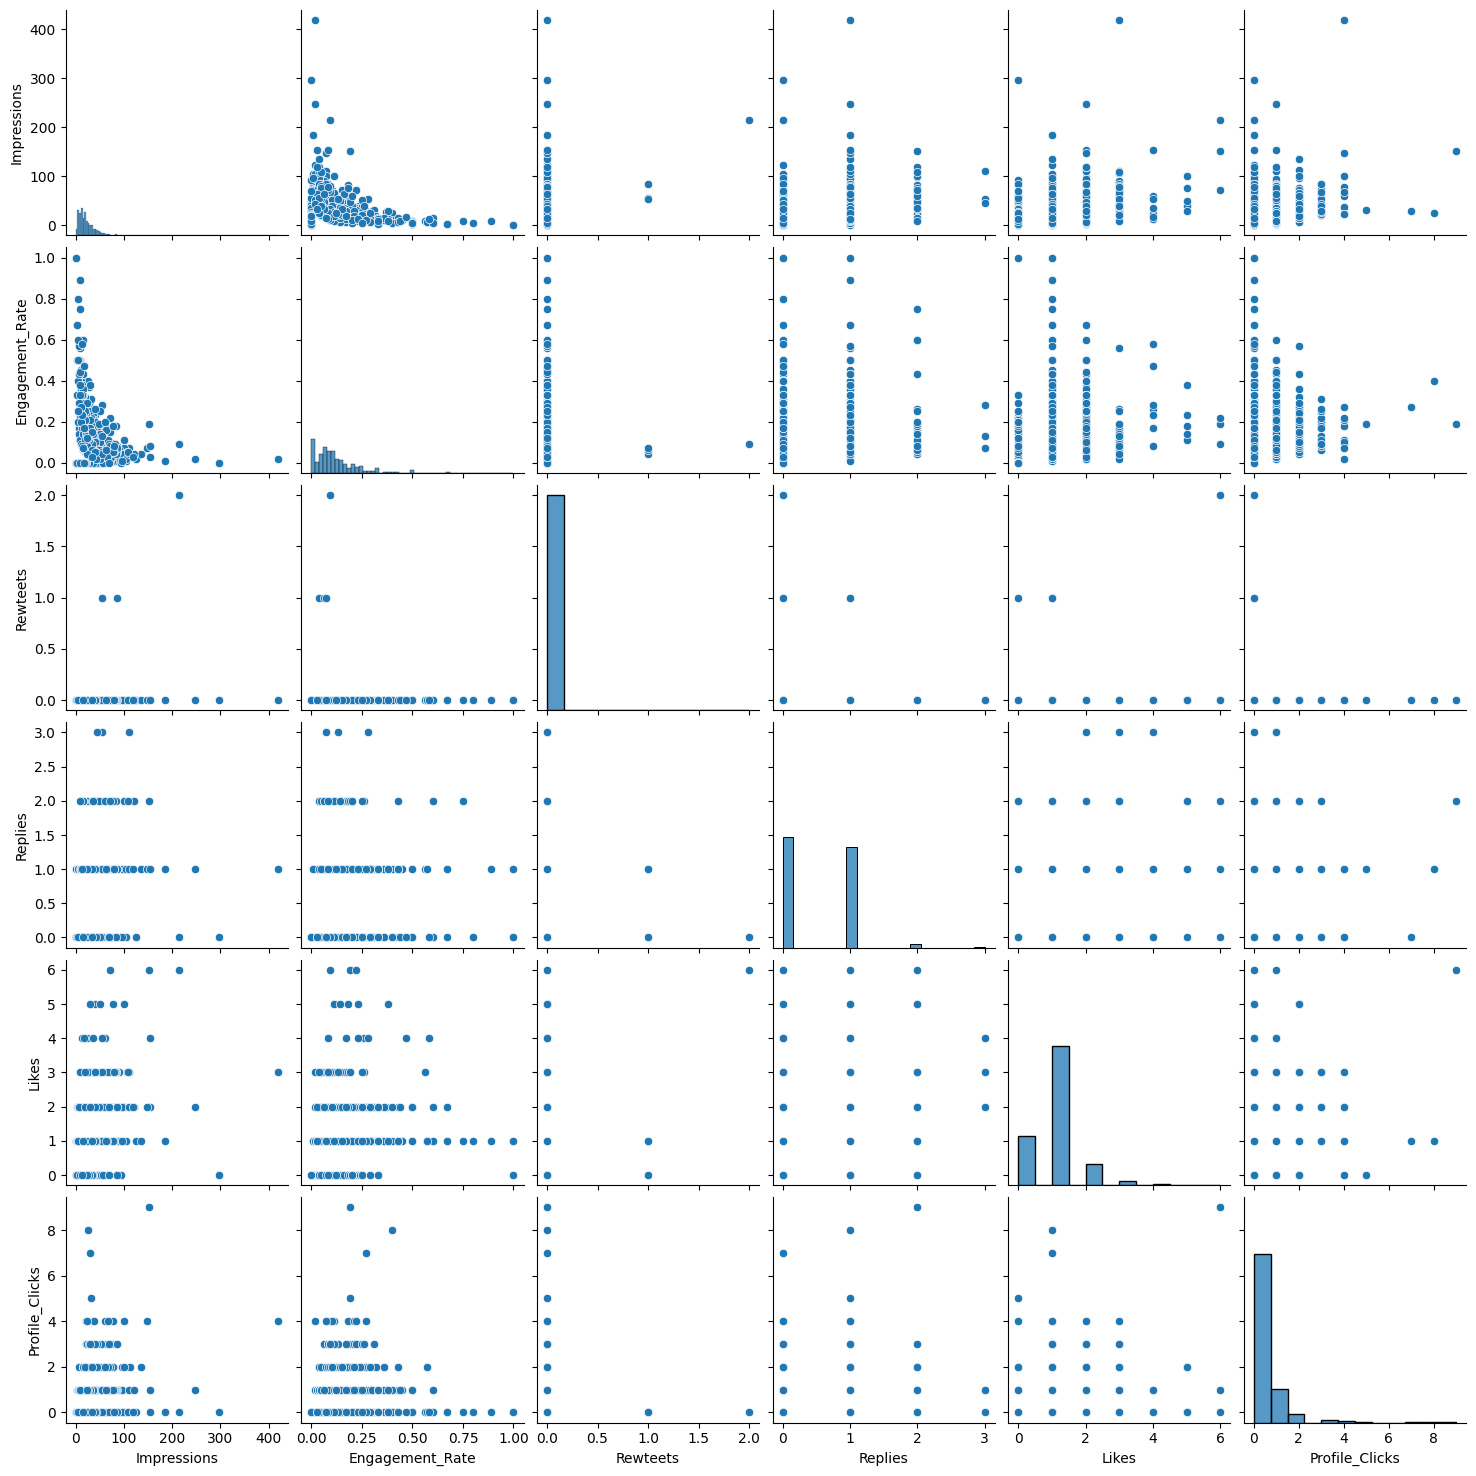

In [32]:
_specific_data = comments_only[['Impressions','Engagement_Rate','Rewteets','Replies','Likes','Profile_Clicks']]

sns.pairplot(_specific_data)
plt.show()

In [33]:
twitter.columns

Index(['Tweet_Id', 'Tweet_Date', 'Tweet_Time', 'Tweet_Content',
       'Tweet_Or_Comment', 'Tweet_Length_Range', 'Impressions', 'Engagements',
       'Engagement_Rate', 'Rewteets', 'Replies', 'Likes', 'Profile_Clicks',
       'URL_Clicks', 'Detail_Expands', 'Follows', 'Media_Views',
       'Media_Engagements'],
      dtype='object')

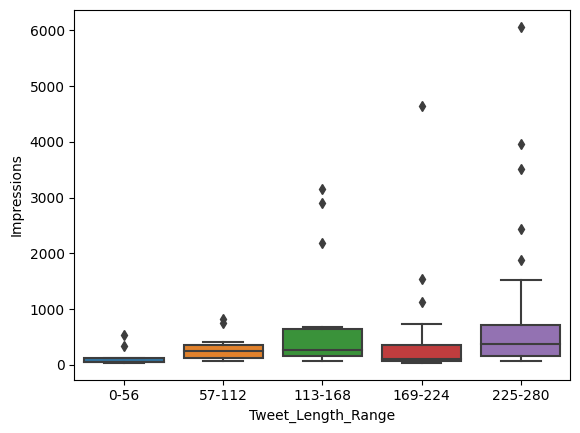

In [36]:
sns.boxplot(x='Tweet_Length_Range',y='Impressions',order=['0-56','57-112','113-168','169-224','225-280'],data=tweets_only)
plt.show()

In [35]:
twitter['Tweet_Length_Range'].value_counts()

57-112     557
113-168    506
0-56       415
169-224    317
225-280    221
Name: Tweet_Length_Range, dtype: int64

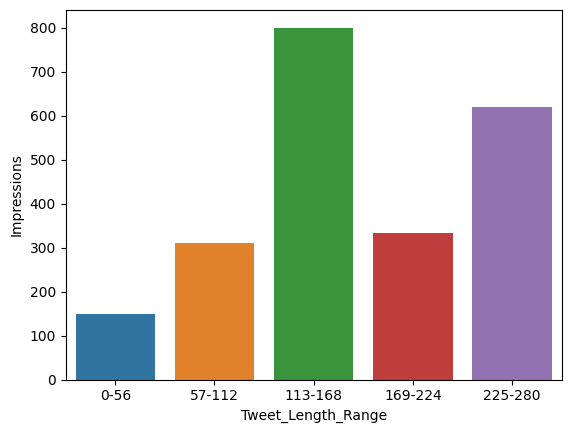

In [40]:
range_averages = tweets_only.groupby('Tweet_Length_Range')['Impressions'].mean().reset_index()
sns.barplot(x='Tweet_Length_Range',y='Impressions',order=['0-56','57-112','113-168','169-224','225-280'],data=range_averages)
plt.show()